# 4 利用Pytorch实现softmax回归的简洁实现

In [40]:
import torch
from torch import nn
from torch.nn import init
import numpy as np
import sys
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms

print(torch.__version__)

1.8.0


## 4.1 加载图像分类数据集（Fashion-MNIST）

In [41]:
mnist_train = torchvision.datasets.FashionMNIST(root='./dataset/FashionMNIST', train=True, download=True, transform=transforms.ToTensor())
mnist_test = torchvision.datasets.FashionMNIST(root='./dataset/FashionMNIST', train=False, download=True, transform=transforms.ToTensor())

In [42]:
print(type(mnist_train))
print(len(mnist_train), len(mnist_test))

<class 'torchvision.datasets.mnist.FashionMNIST'>
60000 10000


In [43]:
def get_fashion_mnist_labels(labels):
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]

def show_fashion_mnist(images, labels):
    d2l.use_svg_display()
    # 这里的_表示我们忽略（不使用）的变量
    _, figs = plt.subplots(1, len(images), figsize=(12, 12))
    for f, img, lbl in zip(figs, images, labels):
        f.imshow(img.view((28, 28)).numpy())
        f.set_title(lbl)
        f.axes.get_xaxis().set_visible(False)
        f.axes.get_yaxis().set_visible(False)
    plt.show()

D:\Anaconda\envs\pytorch\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  


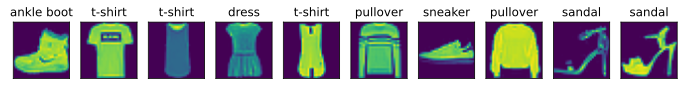

In [44]:
X, y = [], []
for i in range(10):
    X.append(mnist_train[i][0])
    y.append(mnist_train[i][1])
from IPython import display
def use_svg_display():
    """Use svg format to display plot in jupyter"""
    display.set_matplotlib_formats('svg')
def show_fashion_mnist(images, labels):
    use_svg_display()
    # 杩欓噷鐨刜琛ㄧず鎴戜滑蹇界暐锛堜笉浣跨敤锛夌殑鍙橀噺
    _, figs = plt.subplots(1, len(images), figsize=(12, 12))
    for f, img, lbl in zip(figs, images, labels):
        f.imshow(img.view((28, 28)).numpy())
        f.set_title(lbl)
        f.axes.get_xaxis().set_visible(False)
        f.axes.get_yaxis().set_visible(False)
    
show_fashion_mnist(X, get_fashion_mnist_labels(y))

In [117]:
import torch.nn.functional as F
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(784, 2000) #784表示输入神经元数量,2000表示这一层输出神经元数量
        self.bn1 = nn.BatchNorm1d(2000)
        self.fc2 = nn.Linear(2000, 1000)#第二层
        self.bn2 = nn.BatchNorm1d(1000)
        self.fc3 = nn.Linear(1000, 500)#第三层
        self.bn3 = nn.BatchNorm1d(500)
        self.fc4 = nn.Linear(500, 100)
        self.bn4 = nn.BatchNorm1d(100)
        self.fc5 = nn.Linear(100, 10)#最后一层直接输出10个类别的概率

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = F.relu(self.fc1(x))
        x = self.bn1(x)
        x = F.relu(self.fc2(x))
        x = self.bn2(x)
        x = F.relu(self.fc3(x))
        x = self.bn3(x)
        x = F.relu(self.fc4(x))
        x = self.bn4(x)
        x = self.fc5(x)
        
        return F.log_softmax(x, dim=1)  #最后一层softmax输出分类概率

## 4.2 获取和读取数据
可选择不同的batch_size

In [134]:
batch_size = 64
num_workers = 0
train_iter = torch.utils.data.DataLoader(mnist_train, batch_size=batch_size, shuffle=True, num_workers=num_workers)
test_iter = torch.utils.data.DataLoader(mnist_test, batch_size=batch_size, shuffle=False, num_workers=num_workers)

## 4.3 定义和初始化模型

In [119]:
num_inputs = 784
num_outputs = 10

#定义模型（添加）
class LinearNet(nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super(LinearNet, self).__init__()
        self.linear = nn.Linear(784,10)
    #    self.dropout = nn.Dropout()
    def init_weights(self):
        self.linear.weight.data.uniform_(-1, 1)
        self.linear.bias.data.fill_(0)

    def forward(self, x):  # x shape: (batch, 1, 28, 28)
        y = self.linear(x.view(x.shape[0], -1))
        return y



In [120]:
#输出初始化的参数（添加）
net = LinearNet(num_inputs,num_outputs)
net = net.cuda()
for param in net.parameters():
    print(param)

Parameter containing:
tensor([[-0.0083, -0.0286,  0.0189,  ...,  0.0028,  0.0325, -0.0309],
        [-0.0190,  0.0271, -0.0333,  ..., -0.0266,  0.0050,  0.0238],
        [-0.0254,  0.0009, -0.0266,  ..., -0.0160,  0.0125,  0.0182],
        ...,
        [-0.0288, -0.0136, -0.0128,  ..., -0.0315,  0.0222,  0.0213],
        [ 0.0035, -0.0179, -0.0165,  ..., -0.0037, -0.0192,  0.0134],
        [ 0.0307,  0.0166, -0.0167,  ...,  0.0337,  0.0320, -0.0299]],
       device='cuda:0', requires_grad=True)
Parameter containing:
tensor([-0.0283,  0.0082, -0.0200,  0.0319, -0.0281,  0.0093,  0.0157,  0.0203,
         0.0090,  0.0096], device='cuda:0', requires_grad=True)


In [135]:
net = MLP()
net = net.cuda()


## 4.4 softmax和交叉熵损失函数

In [136]:
loss = nn.CrossEntropyLoss()
loss = loss.cuda()

## 4.5 定义优化算法
可选择多种优化算法训练模型(查官网资料)

可选择不同的学习率

In [137]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.001)

In [124]:
optimizer = torch.optim.Adagrad(net.parameters(), lr=0.001)

In [128]:
optimizer = torch.optim.RMSprop(net.parameters(), lr=0.001)

In [138]:
optimizer = torch.optim.Adam(net.parameters(), lr=0.0001)

## 4.6 训练模型

## 定义评价函数代码

In [132]:
def evaluate_accuracy(data_iter, net, device=None):
    if device is None and isinstance(net, torch.nn.Module):
        # 如果没指定device就使用net的device
        device = list(net.parameters())[0].device 
    acc_sum, n = 0.0, 0
    with torch.no_grad():
        for X, y in data_iter:
            if isinstance(net, torch.nn.Module):
                net.eval() # 评估模式, 这会关闭dropout
                acc_sum += (net(X.to(device)).argmax(dim=1) == y.to(device)).float().sum().cpu().item()
                net.train() # 改回训练模式
            else: # 自定义的模型, 3.13节之后不会用到, 不考虑GPU
                if('is_training' in net.__code__.co_varnames): # 如果有is_training这个参数
                    # 将is_training设置成False
                    acc_sum += (net(X, is_training=False).argmax(dim=1) == y).float().sum().item() 
                else:
                    acc_sum += (net(X).argmax(dim=1) == y).float().sum().item() 
            n += y.shape[0]
    return acc_sum / n

## 模型训练过程 代码（添加）
可选择不同epoch大小
训练过程代码自行添加

In [139]:
num_epochs = 10

losses = []
accuracies = []
accuracies2 = []
for epoch in range(num_epochs):
    train_l_sum, train_acc_sum, n = 0.0, 0.0, 0
    for X, y in train_iter:
        X = X.cuda()
        y = y.cuda()
        y_hat=net(X)

        l =loss(y_hat,y).sum()
        optimizer.zero_grad()
        l.backward()
        optimizer.step()

        train_l_sum += l.item()
        train_acc_sum += (y_hat.argmax(dim=1) == y).sum().item()
        losses.append(l.item())
        n += y.shape[0]
        
        
    test_acc = evaluate_accuracy(test_iter,net)
    accuracies.append(test_acc)
    accuracies2.append(train_acc_sum / n)
    print('epoch %d, loss %.4f, train acc %.3f, test acc %.3f'
          % (epoch + 1, train_l_sum / n, train_acc_sum / n, test_acc))


epoch 1, loss 0.0071, train acc 0.851, test acc 0.871
epoch 2, loss 0.0051, train acc 0.882, test acc 0.873
epoch 3, loss 0.0045, train acc 0.895, test acc 0.884
epoch 4, loss 0.0041, train acc 0.901, test acc 0.879
epoch 5, loss 0.0039, train acc 0.907, test acc 0.885
epoch 6, loss 0.0036, train acc 0.915, test acc 0.889
epoch 7, loss 0.0034, train acc 0.920, test acc 0.886
epoch 8, loss 0.0032, train acc 0.925, test acc 0.888
epoch 9, loss 0.0030, train acc 0.929, test acc 0.890
epoch 10, loss 0.0029, train acc 0.931, test acc 0.886


## 4.7 训练过程可视化
参考线性回归的代码展现可视化过程，loss以及准确率的变化图

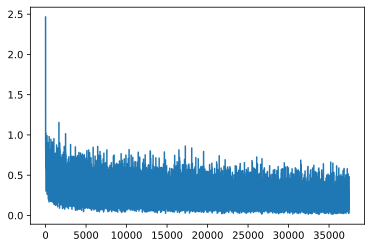

In [37]:
plt.plot(losses)
plt.show()

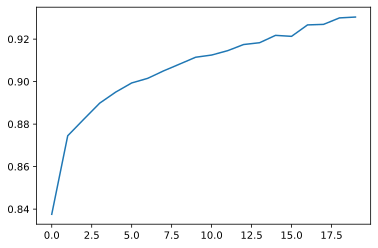

In [38]:
plt.plot(accuracies2)
plt.show()

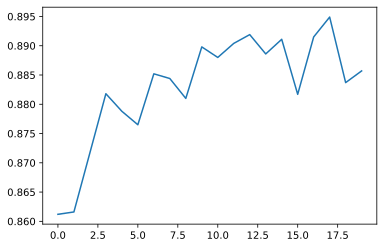

In [39]:
plt.plot(accuracies)
plt.show()